In [1]:
import utils.unet_utils as ut
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader
from utils.unet_utils import train
from DataSet import ImSegDataSet
import time

In [2]:
#Use the cross entropy loss, since we have more than two classes per pixel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

# = nn.CrossEntropyLoss()


#####
#New loss

!pip install -U segmentation-models-pytorch
import segmentation_models_pytorch as smp

TverskyLoss = smp.losses.TverskyLoss(mode = 'multilabel', log_loss = False)
BCELoss     = smp.losses.SoftBCEWithLogitsLoss()

def criterion(input,target):


    pred_one_hot = torch.nn.functional.one_hot(pred.long(), num_classes = 24).to(torch.float32)
    target_one_hot = torch.nn.functional.one_hot(target.long(), num_classes = 24).to(torch.float32)

    return 0.5 * BCELoss(pred_one_hot, target_one_hot) + 0.5 * TverskyLoss(pred, target)
crit = criterion

model = ut.UNet(3, 24, [64, 128, 256, 512]).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

#Data set and data loader for the training set
DS_training = ImSegDataSet(PathToDataSet="./data/train_set/",mode = "train")
DL_training = DataLoader(dataset=DS_training,batch_size=1,shuffle=True)

#Data set and data loader for the validation set
print("\n")
DS_validation = ImSegDataSet(PathToDataSet="./data/validation_set/",mode = "validation")
DL_validation = DataLoader(dataset=DS_validation,batch_size=5)

'''
result = train(
    model = model, 
    dataloader_training = DL_training, 
    dataLoader_validation = DL_validation,
    optimizer = optimizer, 
    criterion = crit, 
    device = device, 
    buffer_size = 5, 
    buffer_update_freq = 5,
    buffer_pick_size = 3,
    n_epochs = 5,
    patch_size = 32,
    tag = "test_run_1_2023-03-20"
    )
'''

result = train(
    model = model, 
    dataloader_training = DL_training, 
    dataLoader_validation = DL_validation,
    optimizer = optimizer, 
    criterion = crit, 
    device = device, 
    buffer_size = 10, 
    buffer_update_freq = 1,
    buffer_pick_size = 1,
    n_epochs = 5,
    patch_size = 512,
    tag = "test{}".format(time.strftime("%d-%H%M%S", time.gmtime(time.time()))),
    rotation = False,
    mirroring = True
    )

     -------------------------------------- 106.7/106.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 549.1/549.1 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 199.8/199.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=e713c05af568db03b466382b7e0120bd34be955c78b507781bcd8340b1839123
  Stored in directory: c:\users\swahl\appdata\local\pip\cache\wheels\03\3f\e9\911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=cde3c543cbe4f03fdac98f49f99586bed239365ff94c972dcb996a4be9e53fd9

TypeError: Instance and class checks can only be used with @runtime_checkable protocols

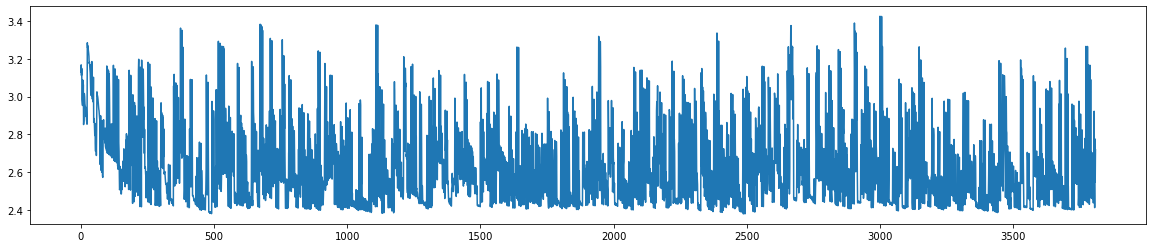

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)
loss = np.loadtxt("./results/test22-165755/data/training_loss.txt", skiprows=1)
plt.plot(np.arange(len(loss)), loss)